# Neuronale Netze programmieren 
## Version mit CNN und Pooling
### Datum: 10.12.2019
### Kurs: VHS Ludwigsburg - Maschinelles Lernen
In diesem Projekt geht es darum Kleidung zu kategorisieren. Einfach gesagt, wir trainieren unser neuronales Netz mit 70.000 Bildern von Kleidung und am Ende wollen wir ihm ein Bild der Kleidung zeigen und es soll vorhersagen, was es ist.

Die verwendete Datensammlung heiß MNIST Fashion.


## So sehen die BIlder in unserem Datenset aus
![Bilder der Kleidung](https://tensorflow.org/images/fashion-mnist-sprite.png)


# So sind die Labels des Datensets definiert
0	T-shirt/top

1	Trouser

2	Pullover

3	Dress

4	Coat

5	Sandal

6	Shirt

7	Sneaker

8	Bag

9	Ankle boot

In [174]:
%tensorflow_version 1.x
import tensorflow as tf 
import numpy as np
#from keras.preprocessing import image
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras import models

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.975):
      print("Das neuronale Netz ist akkurat genug.")
      self.model.stop_training = True

callbacks = myCallback()

labels = ["Shirt", "Hose", "Pullover", "Kleid", "Mantel", "Sandale", "Shirt", "Sneaker", "Tasche", "Stiefel"]


mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images = training_images.reshape(60000, 28, 28, 1)
training_images = training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images = test_images / 255.0

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(400, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images,training_labels, epochs=1, callbacks=[callbacks])

Train on 60000 samples
60000/60000 [==============================] - 19s 324us/sample - loss: 0.4258 - acc: 0.8449


### Test des neuronalen Netzes mit den Testbildern aus dem Datensatz

### Erstes Beispiel Kontrolle Lernerfolg

In [175]:
Auswahl = 125
classes = model.predict(test_images)
print("Wahrscheinlichkeiten:")
print(classes[Auswahl])
print("\n")
w = np.argmax(classes[Auswahl])
print("Wahrscheinlichstes Label:",w)
print("Es ist wahrscheinlich ein(e) ",labels[w])

Wahrscheinlichkeiten:
[8.6131150e-01 2.1720758e-05 5.4721971e-04 1.7120615e-04 1.7466340e-05
 1.1982547e-05 1.3775162e-01 1.1708510e-07 1.6655623e-04 5.7016291e-07]


Wahrscheinlichstes Label: 0
Es ist wahrscheinlich ein(e)  Shirt


### Das geteste Bild anzeigen

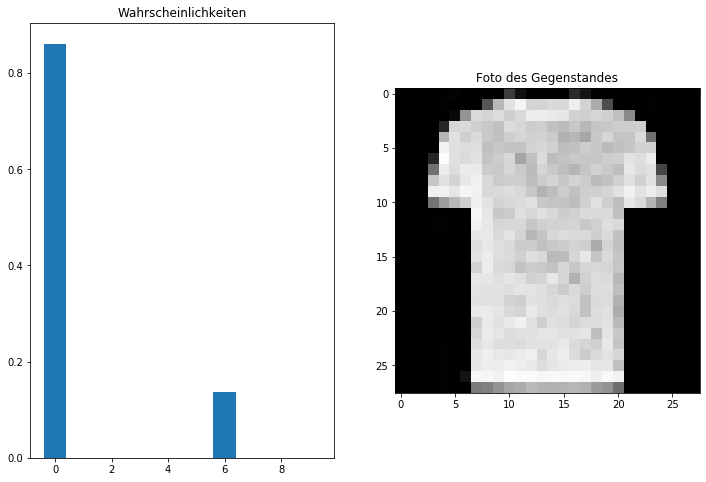

In [176]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
plt.figure(0, figsize=(12,8))
plt.subplot(1,2,1)
plt.title("Wahrscheinlichkeiten")
plt.bar(range(10), classes[Auswahl])
plt.subplot(1,2,2)
plt.title("Foto des Gegenstandes")
plt.imshow(test_images[Auswahl], cmap='Greys_r')
plt.show()

### Zweites Beispiel Kontrolle Lernerfolg

In [177]:
Auswahl2 = 820
print("Wahrscheinlichkeiten:")
print(classes[Auswahl2])
print("\n")
w = np.argmax(classes[Auswahl2])
print("Wahrscheinlichstes Label:",w)
print("Es ist wahrscheinlich ein(e) ",labels[w])

Wahrscheinlichkeiten:
[1.5363136e-07 2.0808383e-08 4.2991605e-08 8.9074653e-08 7.9264389e-08
 1.5372304e-04 1.2854596e-07 2.4165722e-04 5.2829648e-07 9.9960369e-01]


Wahrscheinlichstes Label: 9
Es ist wahrscheinlich ein(e)  Stiefel


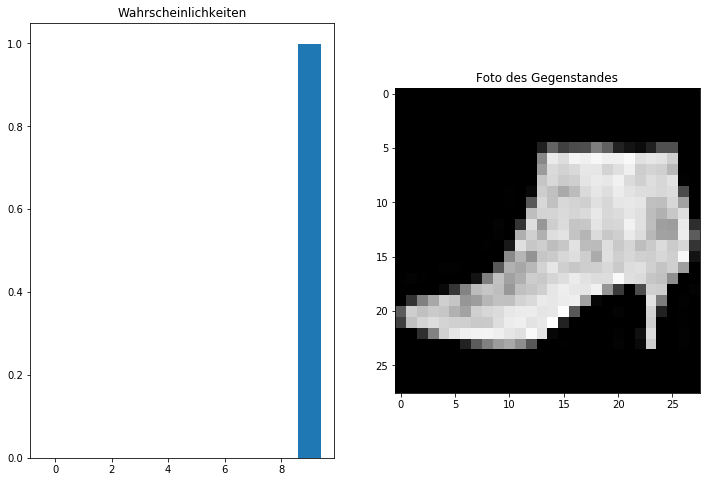

In [178]:
#(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
plt.figure(1, figsize=(12,8))
plt.subplot(1,2,1)
plt.title("Wahrscheinlichkeiten")
plt.bar(range(10), classes[Auswahl2])
plt.subplot(1,2,2)
plt.title("Foto des Gegenstandes")
plt.imshow(test_images[Auswahl2], cmap='Greys_r')
plt.show()